# Problem 1 - Term - Frequency Inverse Document Frequency

In [245]:
import pandas as pd
import numpy as np
import re
import nltk
import string


In [246]:
# importing stopwords

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [247]:
# Reading text file

f = open("TF-IDF_dataset.txt", "rb")
filetxt = f.read().decode('utf-8')
docs = re.split("Chapter [0-9]+\n",filetxt,flags=re.IGNORECASE)


## Text Preprocessing

In [248]:
# Converting document text to lower case to remove stop words

docs_data = []
for i in range(len(docs)):
    docs_data.append(np.char.lower(docs[i]))

In [249]:
for j in range(len(docs_data)):
    print(docs_data[j])



i am by birth a genevese, and my family is one of the most
distinguished of that republic.  my ancestors had been for many years
counsellors and syndics, and my father had filled several public
situations with honour and reputation.  he was respected by all who
knew him for his integrity and indefatigable attention to public
business.  he passed his younger days perpetually occupied by the
affairs of his country; a variety of circumstances had prevented his
marrying early, nor was it until the decline of life that he became a
husband and the father of a family.

as the circumstances of his marriage illustrate his character, i cannot
refrain from relating them.  one of his most intimate friends was a
merchant who, from a flourishing state, fell, through numerous
mischances, into poverty.  this man, whose name was beaufort, was of a
proud and unbending disposition and could not bear to live in poverty
and oblivion in the same country where he had formerly been
distinguished for his ran

In [250]:
print(len(docs_data))

9


In [251]:
# remove punctuations

#def remove_punctuation(text):
    #print(text)
    #text_data = "".join([word for word in str(text) if word not in string.punctuation])
#    symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
#    for i in symbols:
#        data = np.char.replace(text, i, ' ')
#        data = np.char.replace(data, "'", "")
#    return data

In [252]:


#def remove_stopwords(texts):
#    for text in range(len(texts)):
#        data = np.char.replace(texts[text], "''", "")
#        print(texts[text].split(" "))
        
    #new_text = ""
    #print(text.split(" "))
    #tokens = re.split('\W+', text)
    #for token in tokens:
    #    if token not in stopwords:
    #        new_text = new_text + " " + token
    #return new_text
    
       

In [253]:
ps = nltk.PorterStemmer()
def clean_text(text):
    # remove punctuations
    text = "".join([word.lower() for word in str(text) if word not in string.punctuation])
    tokens = re.split('\W+', text)
    # remove stopwords and stemming
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [254]:
processed_docs = []
def preprocessing(docs_data):
    for i in range(len(docs_data)):
        data = clean_text(docs_data[i])
        processed_docs.append(data)
    return processed_docs  


In [255]:
processed_text = preprocessing(docs_data)
print(processed_text)

[[''], ['', 'birth', 'geneves', 'famili', 'one', 'distinguish', 'republ', 'ancestor', 'mani', 'year', 'counsellor', 'syndic', 'father', 'fill', 'sever', 'public', 'situat', 'honour', 'reput', 'respect', 'knew', 'integr', 'indefatig', 'attent', 'public', 'busi', 'pass', 'younger', 'day', 'perpetu', 'occupi', 'affair', 'countri', 'varieti', 'circumst', 'prevent', 'marri', 'earli', 'declin', 'life', 'becam', 'husband', 'father', 'famili', 'circumst', 'marriag', 'illustr', 'charact', 'cannot', 'refrain', 'relat', 'one', 'intim', 'friend', 'merchant', 'flourish', 'state', 'fell', 'numer', 'mischanc', 'poverti', 'man', 'whose', 'name', 'beaufort', 'proud', 'unbend', 'disposit', 'could', 'bear', 'live', 'poverti', 'oblivion', 'countri', 'formerli', 'distinguish', 'rank', 'magnific', 'paid', 'debt', 'therefor', 'honour', 'manner', 'retreat', 'daughter', 'town', 'lucern', 'live', 'unknown', 'wretched', 'father', 'love', 'beaufort', 'truest', 'friendship', 'deepli', 'griev', 'retreat', 'unfortun

In [256]:
def remove_values_from_list(the_list, val):
    return [value for value in the_list if value != val]

In [257]:
# removing empty word
for i in range(len(processed_text)):
    processed_text[i].remove('')
    #filter(lambda a: a != '', processed_text[i])
processed_text

[[],
 ['birth',
  'geneves',
  'famili',
  'one',
  'distinguish',
  'republ',
  'ancestor',
  'mani',
  'year',
  'counsellor',
  'syndic',
  'father',
  'fill',
  'sever',
  'public',
  'situat',
  'honour',
  'reput',
  'respect',
  'knew',
  'integr',
  'indefatig',
  'attent',
  'public',
  'busi',
  'pass',
  'younger',
  'day',
  'perpetu',
  'occupi',
  'affair',
  'countri',
  'varieti',
  'circumst',
  'prevent',
  'marri',
  'earli',
  'declin',
  'life',
  'becam',
  'husband',
  'father',
  'famili',
  'circumst',
  'marriag',
  'illustr',
  'charact',
  'cannot',
  'refrain',
  'relat',
  'one',
  'intim',
  'friend',
  'merchant',
  'flourish',
  'state',
  'fell',
  'numer',
  'mischanc',
  'poverti',
  'man',
  'whose',
  'name',
  'beaufort',
  'proud',
  'unbend',
  'disposit',
  'could',
  'bear',
  'live',
  'poverti',
  'oblivion',
  'countri',
  'formerli',
  'distinguish',
  'rank',
  'magnific',
  'paid',
  'debt',
  'therefor',
  'honour',
  'manner',
  'retre

In [258]:
len(processed_text)

9

In [259]:
#Calculating Document frequency

DF = {}
for i in range(len(processed_text)):
    tokens = processed_text[i]
    for w in tokens:
        try:
            DF[w].add(i)
        except:
            DF[w] = {i}

In [260]:
def doc_freq(word):
    c = 0
    try:
        c = DF[word]
    except:
        pass
    return c

In [261]:
# calculating the term frequency in each document "tf(t,d) = count of t in d / number of words in d"

from collections import Counter
term_freq={}
for i in range(len(processed_text)):
    tokens = processed_text[i]
    count  = Counter(tokens)
    for token in np.unique(tokens):
        #print(token)
        tf_value = count[token]/len(tokens)
        df = doc_freq(token)
        try:
            term_freq[token].add(tf_value)
        except:
            term_freq[token] = {tf_value}


In [263]:
# top 20 term frequency

l = []
term_freq_weights = sorted(term_freq.items(), key=lambda x: x[1], reverse=True)
for i in term_freq_weights[:20]:
    l.append(i[0])
    
print(l)

['', 'affect', 'attent', 'affair', 'ancestor', 'assist', 'beaufort', 'becam', 'birth', 'busi', 'cannot', 'circumst', 'could', 'countri', 'day', 'deepli', 'disposit', 'endeavour', 'earli', 'credit']


In [229]:
doc = 0

tf_idf = {}
N = len(processed_text)

for i in range(N):
    tokens = processed_text[i]
    for token in np.unique(tokens):
        idf = np.log((N+1)/(df + 1))
        tf_idf[doc, token] = tf*idf
    doc += 1

TypeError: unsupported operand type(s) for +: 'set' and 'int'

In [205]:
# Calculating TF-IDF


idf = np.log((N+1)/(df+1))

9

In [ ]:
# calculating TF-IDF



# Problem 2 - Part of Speech Tagging

In [251]:
import nltk

nltk.download('universal_tagset')

nltk.download('brown')

from nltk.corpus import brown

sent_tag = brown.tagged_sents(tagset='universal')

[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\universal_tagset.zip.
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.


In [252]:
sent_tag

[[('The', 'DET'), ('Fulton', 'NOUN'), ('County', 'NOUN'), ('Grand', 'ADJ'), ('Jury', 'NOUN'), ('said', 'VERB'), ('Friday', 'NOUN'), ('an', 'DET'), ('investigation', 'NOUN'), ('of', 'ADP'), ("Atlanta's", 'NOUN'), ('recent', 'ADJ'), ('primary', 'NOUN'), ('election', 'NOUN'), ('produced', 'VERB'), ('``', '.'), ('no', 'DET'), ('evidence', 'NOUN'), ("''", '.'), ('that', 'ADP'), ('any', 'DET'), ('irregularities', 'NOUN'), ('took', 'VERB'), ('place', 'NOUN'), ('.', '.')], [('The', 'DET'), ('jury', 'NOUN'), ('further', 'ADV'), ('said', 'VERB'), ('in', 'ADP'), ('term-end', 'NOUN'), ('presentments', 'NOUN'), ('that', 'ADP'), ('the', 'DET'), ('City', 'NOUN'), ('Executive', 'ADJ'), ('Committee', 'NOUN'), (',', '.'), ('which', 'DET'), ('had', 'VERB'), ('over-all', 'ADJ'), ('charge', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('election', 'NOUN'), (',', '.'), ('``', '.'), ('deserves', 'VERB'), ('the', 'DET'), ('praise', 'NOUN'), ('and', 'CONJ'), ('thanks', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('City

In [255]:
#Getting the tagged sentences
mod_sent_tag=[]
for s in sent_tag:
  s.insert(0,('##','##'))
  s.append(('&&','&&'))
  mod_sent_tag.append(s)

In [256]:
mod_sent_tag

[[('##', '##'),
  ('The', 'AT'),
  ('Fulton', 'NP-TL'),
  ('County', 'NN-TL'),
  ('Grand', 'JJ-TL'),
  ('Jury', 'NN-TL'),
  ('said', 'VBD'),
  ('Friday', 'NR'),
  ('an', 'AT'),
  ('investigation', 'NN'),
  ('of', 'IN'),
  ("Atlanta's", 'NP$'),
  ('recent', 'JJ'),
  ('primary', 'NN'),
  ('election', 'NN'),
  ('produced', 'VBD'),
  ('``', '``'),
  ('no', 'AT'),
  ('evidence', 'NN'),
  ("''", "''"),
  ('that', 'CS'),
  ('any', 'DTI'),
  ('irregularities', 'NNS'),
  ('took', 'VBD'),
  ('place', 'NN'),
  ('.', '.'),
  ('&&', '&&')],
 [('##', '##'),
  ('The', 'AT'),
  ('jury', 'NN'),
  ('further', 'RBR'),
  ('said', 'VBD'),
  ('in', 'IN'),
  ('term-end', 'NN'),
  ('presentments', 'NNS'),
  ('that', 'CS'),
  ('the', 'AT'),
  ('City', 'NN-TL'),
  ('Executive', 'JJ-TL'),
  ('Committee', 'NN-TL'),
  (',', ','),
  ('which', 'WDT'),
  ('had', 'HVD'),
  ('over-all', 'JJ'),
  ('charge', 'NN'),
  ('of', 'IN'),
  ('the', 'AT'),
  ('election', 'NN'),
  (',', ','),
  ('``', '``'),
  ('deserves', 'VBZ'),

In [257]:
#Splitting the data for train and test
split_num = int(len(mod_sent_tag)*0.9)
train_data = mod_sent_tag[0:split_num]
test_data = mod_sent_tag[split_num:]

In [258]:
train_data

[[('##', '##'),
  ('The', 'AT'),
  ('Fulton', 'NP-TL'),
  ('County', 'NN-TL'),
  ('Grand', 'JJ-TL'),
  ('Jury', 'NN-TL'),
  ('said', 'VBD'),
  ('Friday', 'NR'),
  ('an', 'AT'),
  ('investigation', 'NN'),
  ('of', 'IN'),
  ("Atlanta's", 'NP$'),
  ('recent', 'JJ'),
  ('primary', 'NN'),
  ('election', 'NN'),
  ('produced', 'VBD'),
  ('``', '``'),
  ('no', 'AT'),
  ('evidence', 'NN'),
  ("''", "''"),
  ('that', 'CS'),
  ('any', 'DTI'),
  ('irregularities', 'NNS'),
  ('took', 'VBD'),
  ('place', 'NN'),
  ('.', '.'),
  ('&&', '&&')],
 [('##', '##'),
  ('The', 'AT'),
  ('jury', 'NN'),
  ('further', 'RBR'),
  ('said', 'VBD'),
  ('in', 'IN'),
  ('term-end', 'NN'),
  ('presentments', 'NNS'),
  ('that', 'CS'),
  ('the', 'AT'),
  ('City', 'NN-TL'),
  ('Executive', 'JJ-TL'),
  ('Committee', 'NN-TL'),
  (',', ','),
  ('which', 'WDT'),
  ('had', 'HVD'),
  ('over-all', 'JJ'),
  ('charge', 'NN'),
  ('of', 'IN'),
  ('the', 'AT'),
  ('election', 'NN'),
  (',', ','),
  ('``', '``'),
  ('deserves', 'VBZ'),

In [259]:
#Creating a dictionary whose keys are tags and values contain words which were assigned the correspoding tag
# ex:- 'TAG':{word1: count(word1,'TAG')}
train_word_tag = {}
for s in train_data:
  for (w,t) in s:
    w=w.lower()
    try:
      try:
        train_word_tag[t][w]+=1
      except:
        train_word_tag[t][w]=1
    except:
      train_word_tag[t]={w:1}

In [260]:
train_word_tag

{'##': {'##': 51606},
 'AT': {'the': 64805,
  'an': 3456,
  'no': 1649,
  'a': 20956,
  'every': 446,
  "th'": 1},
 'NP-TL': {'fulton': 10,
  'atlanta': 4,
  'grady': 4,
  'georgia': 14,
  'jackson': 2,
  'miller': 2,
  'colquitt': 1,
  'texas': 17,
  'dallas': 13,
  'beaumont': 1,
  'lamar': 2,
  'texan': 1,
  'wise': 1,
  'paris': 3,
  'oklahoma': 3,
  'rhode': 99,
  'massachusetts': 14,
  'u.s.': 56,
  'denton': 1,
  'york': 285,
  'st.': 11,
  'louis': 13,
  'cook': 2,
  'republican': 9,
  'atlantic': 6,
  'viet': 10,
  'nam': 9,
  'lao': 3,
  'boston': 11,
  'america': 73,
  'asia': 18,
  'providence': 38,
  'narragansett': 4,
  'sheraton-biltmore': 3,
  'johnston': 4,
  'westfield': 2,
  'jersey': 19,
  'mack': 1,
  'kennedy': 10,
  'essex': 5,
  'orange': 5,
  'michigan': 5,
  'morris': 3,
  'brooklyn': 16,
  'feis': 1,
  'hunter': 3,
  'u.': 36,
  's.': 37,
  'times-picayune': 1,
  'orleans': 39,
  'miles': 1,
  'pennsylvania': 14,
  'columbia': 16,
  'lafayette': 6,
  'samoa':

In [261]:
#Calculating the emission probabilities using train_word_tag.
train_emission_prob={}
for k in train_word_tag.keys():
  train_emission_prob[k]={}
  count = sum(train_word_tag[k].values())
  for k2 in train_word_tag[k].keys():
    train_emission_prob[k][k2]=train_word_tag[k][k2]/count
train_emission_prob

{'##': {'##': 1.0},
 'AT': {'the': 0.7097017949251476,
  'an': 0.037847842037825936,
  'no': 0.018058764907515908,
  'a': 0.22949634772704872,
  'every': 0.004884299059279621,
  "th'": 1.0951343182241303e-05},
 'NP-TL': {'fulton': 0.0025886616619207868,
  'atlanta': 0.0010354646647683149,
  'grady': 0.0010354646647683149,
  'georgia': 0.0036241263266891016,
  'jackson': 0.0005177323323841574,
  'miller': 0.0005177323323841574,
  'colquitt': 0.0002588661661920787,
  'texas': 0.004400724825265338,
  'dallas': 0.003365260160497023,
  'beaumont': 0.0002588661661920787,
  'lamar': 0.0005177323323841574,
  'texan': 0.0002588661661920787,
  'wise': 0.0002588661661920787,
  'paris': 0.000776598498576236,
  'oklahoma': 0.000776598498576236,
  'rhode': 0.02562775045301579,
  'massachusetts': 0.0036241263266891016,
  'u.s.': 0.014496505306756407,
  'denton': 0.0002588661661920787,
  'york': 0.07377685736474243,
  'st.': 0.0028475278281128655,
  'louis': 0.003365260160497023,
  'cook': 0.000517732

In [262]:
#Estimating the bigram of tags to be used for transition probability
bigram_tag_data = {}
for s in train_data:
  bi=list(nltk.bigrams(s))
  for b1,b2 in bi:
    try:
      try:
        bigram_tag_data[b1[1]][b2[1]]+=1
      except:
        bigram_tag_data[b1[1]][b2[1]]=1
    except:
      bigram_tag_data[b1[1]]={b2[1]:1}
bigram_tag_data

{'##': {'AT': 7874,
  '``': 3082,
  'PPS': 5026,
  'NN-HL': 430,
  'WRB': 755,
  'NN': 1324,
  'RB': 3433,
  'NNS-HL': 150,
  'IN': 4521,
  'VB-HL': 16,
  'CD': 695,
  '(': 244,
  'NP': 3335,
  'NN-TL': 398,
  'PP$': 905,
  'PPSS': 2623,
  'NNS': 924,
  'NP$': 250,
  'AT-HL': 114,
  'CS': 2067,
  'CC': 2481,
  'NP-HL': 170,
  '--': 213,
  'AP': 446,
  'EX': 723,
  'VBG': 541,
  'PPSS+BEM': 44,
  'DT': 1547,
  'JJ': 996,
  'ABN': 179,
  'DTS': 403,
  'VBZ-HL': 27,
  'VBN': 266,
  'VBD-HL': 3,
  'ABX': 82,
  'VBG-HL': 66,
  'MD*-HL': 1,
  'AP-HL': 19,
  'JJ-HL': 181,
  'QL': 258,
  ')': 166,
  'JJ-TL': 97,
  'NP-TL': 57,
  'MD': 121,
  'DTI': 234,
  'PN': 231,
  'NR': 61,
  'RBR': 61,
  'PPSS+MD': 91,
  'NN-TL-HL': 45,
  'CD-HL': 215,
  'WDT': 307,
  'VBN-TL-HL': 4,
  'TO': 227,
  'MD-HL': 3,
  'QLP': 1,
  'VBG-TL': 7,
  'NNS-TL': 18,
  "'": 19,
  'NP-TL-HL': 2,
  'DT+BEZ': 42,
  'PPSS+HV': 53,
  'VBD': 45,
  '*': 130,
  'PPS+BEZ': 104,
  'NN$-HL': 18,
  'PPS+MD': 28,
  ',': 11,
  '.': 4

In [263]:
#Calculating the probabilities of tag bigrams for transition probability  
bigram_tag_prob={}
for k in bigram_tag_data.keys():
  bigram_tag_prob[k]={}
  count=sum(bigram_tag_data[k].values())
  for k2 in bigram_tag_data[k].keys():
    bigram_tag_prob[k][k2]=bigram_tag_data[k][k2]/count
bigram_tag_prob

{'##': {'AT': 0.15257915746231057,
  '``': 0.0597217377824284,
  'PPS': 0.09739177615006007,
  'NN-HL': 0.008332364453745689,
  'WRB': 0.014630081773437198,
  'NN': 0.025655931480835562,
  'RB': 0.06652327248769523,
  'NNS-HL': 0.0029066387629345424,
  'IN': 0.08760609231484712,
  'VB-HL': 0.0003100414680463512,
  'CD': 0.01346742626826338,
  '(': 0.004728132387706856,
  'NP': 0.06462426849591132,
  'NN-TL': 0.007712281517652986,
  'PP$': 0.01753672053637174,
  'PPSS': 0.0508274231678487,
  'NNS': 0.017904894779676783,
  'NP$': 0.004844397938224237,
  'AT-HL': 0.002209045459830252,
  'CS': 0.04005348215323799,
  'CC': 0.04807580513893733,
  'NP-HL': 0.0032941905979924813,
  '--': 0.004127427043367051,
  'AP': 0.008642405921792039,
  'EX': 0.014009998837344495,
  'VBG': 0.01048327713831725,
  'PPSS+BEM': 0.0008526140371274658,
  'DT': 0.02997713444173158,
  'JJ': 0.019300081385885362,
  'ABN': 0.003468588923768554,
  'DTS': 0.007809169476417471,
  'VBZ-HL': 0.0005231949773282176,
  'VBN

In [264]:
#Calculating the possible tags for each word
#Note: Here we have used the whole data(Train+Test)
#Reason: There may be some words which are not present in train data but are present in test data 
tags_of_tokens = {}
count=0
for s in train_data:
  for (w,t) in s:
    w=w.lower()
    try:
      if t not in tags_of_tokens[w]:
        tags_of_tokens[w].append(t)
    except:
      l = []
      l.append(t)
      tags_of_tokens[w] = l
        
for s in test_data:
  for (w,t) in s:
    w=w.lower()
    try:
      if t not in tags_of_tokens[w]:
        tags_of_tokens[w].append(t)
    except:
      l = []
      l.append(t)
      tags_of_tokens[w] = l
tags_of_tokens

{'##': ['##'],
 'the': ['AT', 'AT-TL', 'AT-HL', 'AT-NC', 'NIL', 'AT-TL-HL'],
 'fulton': ['NP-TL', 'NP'],
 'county': ['NN-TL', 'NN', 'NN-HL'],
 'grand': ['JJ-TL', 'JJ', 'FW-JJ-TL'],
 'jury': ['NN-TL', 'NN', 'NN-HL'],
 'said': ['VBD', 'VBN', 'VBN-HL'],
 'friday': ['NR', 'NR-TL', 'NP'],
 'an': ['AT', 'AT-HL', 'AT-TL', 'NIL', 'AT-NC', 'CC'],
 'investigation': ['NN', 'NN-TL'],
 'of': ['IN', 'IN-TL', 'IN-HL', 'IN-TL-HL', 'IN-NC', 'NIL'],
 "atlanta's": ['NP$'],
 'recent': ['JJ', 'JJ-HL'],
 'primary': ['NN', 'JJ', 'JJ-HL'],
 'election': ['NN', 'NN-TL'],
 'produced': ['VBD', 'VBN'],
 '``': ['``'],
 'no': ['AT', 'RB', 'AT-HL', 'AT-TL', 'QL', 'RB-NC'],
 'evidence': ['NN', 'VB'],
 "''": ["''"],
 'that': ['CS',
  'WPS',
  'DT',
  'QL',
  'WPO',
  'CS-HL',
  'DT-TL',
  'WPS-TL',
  'DT-HL',
  'DT-NC',
  'NIL',
  'WPS-NC',
  'WPO-NC',
  'CS-NC',
  'WPS-HL'],
 'any': ['DTI', 'QL', 'DTI-HL', 'DTI-TL', 'RB'],
 'irregularities': ['NNS'],
 'took': ['VBD'],
 'place': ['NN', 'VB', 'NN-TL', 'NP', 'NN-HL', 'FW

In [268]:
#Dividing the test data into test words and test tags
test_words=[]
test_tags=[]
for s in test_data:
  temp_word=[]
  temp_tag=[]
  for (w,t) in s:
    temp_word.append(w.lower())
    temp_tag.append(t)
  test_words.append(temp_word)
  test_tags.append(temp_tag)
test_tags

[['##', 'PPS', 'BEDZ', 'RB', 'CD', 'NNS', 'JJ', '.', '&&'],
 ['##', '``', 'DT', 'JJ', 'NN', ',', 'PP$', 'NN', '.', '.', '&&'],
 ['##',
  'RB',
  ',',
  'PPSS',
  'BER',
  'QL',
  'JJ',
  'TO',
  'VB',
  'PPO',
  'RB',
  'PPL',
  "''",
  ',',
  'PPS',
  'VBD',
  ',',
  'VBG',
  'IN',
  'NN',
  '.',
  '&&'],
 ['##',
  'NP',
  'VBD',
  'PP$',
  'NN',
  'IN',
  'AT',
  'NN',
  ',',
  'CC',
  'AT',
  'NN',
  'VBD',
  'PPO',
  'CS',
  'AT',
  'JJ',
  'NN',
  '.',
  '&&'],
 ['##',
  '``',
  'NP',
  'BEZ',
  'TO',
  'BE',
  'PP$',
  'NN',
  'NN',
  ',',
  'NP',
  '.',
  '&&'],
 ['##',
  'PPSS',
  'VB',
  'AT',
  'NN',
  'IN',
  'AT',
  'NN',
  'VBN',
  'IN',
  'PPO',
  'PPS',
  'BEZ',
  'AT',
  'QL',
  'JJ',
  'NN',
  ',',
  'QL',
  'JJ',
  'IN',
  'AP',
  'NNS',
  '.',
  '&&'],
 ['##',
  'PPS',
  'VBZ',
  'AT',
  'JJR',
  'NN',
  'CS',
  'RB',
  'VBG',
  'RB',
  'IN',
  'AT',
  'NP',
  'NN',
  "''",
  '.',
  '&&'],
 ['##', '``', 'QL', 'RB', ',', 'PP$', 'NN', '.', '&&'],
 ['##', 'PP$', 'NN', '

In [269]:
#Executing the Viterbi Algorithm
predicted_tags = []                #intializing the predicted tags
for x in range(len(test_words)):   # for each tokenized sentence in the test data
  s = test_words[x]
  #storing_values is a dictionary which stores the required values
  #ex: storing_values = {step_no.:{state1:[previous_best_state,value_of_the_state]}}                
  storing_values = {}              
  for q in range(len(s)):
    step = s[q]
    #for the starting word of the sentence
    if q == 1:                
      storing_values[q] = {}
      tags = tags_of_tokens[step]
      for t in tags:
        #this is applied since we do not know whether the word in the test data is present in train data or not
        try:
          storing_values[q][t] = ['##',bigram_tag_prob['##'][t]*train_emission_prob[t][step]]
        #if word is not present in the train data but present in test data we assign a very low probability of 0.0001
        except:
          storing_values[q][t] = ['##',0.0001]#*train_emission_prob[t][step]]
    
    #if the word is not at the start of the sentence
    if q>1:
      storing_values[q] = {}
      previous_states = list(storing_values[q-1].keys())   # loading the previous states
      current_states  = tags_of_tokens[step]               # loading the current states
      #calculation of the best previous state for each current state and then storing
      #it in storing_values
      for t in current_states:                             
        temp = []
        for pt in previous_states:                         
          try:
            temp.append(storing_values[q-1][pt][1]*bigram_tag_prob[pt][t]*train_emission_prob[t][step])
          except:
            temp.append(storing_values[q-1][pt][1]*0.0001)
        max_temp_index = temp.index(max(temp))
        best_pt = previous_states[max_temp_index]
        storing_values[q][t]=[best_pt,max(temp)]

  #Backtracing to extract the best possible tags for the sentence
  pred_tags = []
  total_steps_num = storing_values.keys()
  last_step_num = max(total_steps_num)
  for bs in range(len(total_steps_num)):
    step_num = last_step_num - bs
    if step_num == last_step_num:
      pred_tags.append('&&')
      pred_tags.append(storing_values[step_num]['&&'][0])
    if step_num<last_step_num and step_num>0:
      pred_tags.append(storing_values[step_num][pred_tags[len(pred_tags)-1]][0])
  predicted_tags.append(list(reversed(pred_tags)))

predicted_tags

[['##', 'PPS', 'BEDZ', 'RB', 'CD', 'NNS', 'JJ', '.', '&&'],
 ['##', '``', 'DT', 'JJ', 'NN', ',', 'PP$', 'UH', '.', '.', '&&'],
 ['##',
  'RB',
  ',',
  'PPSS',
  'BER',
  'QL',
  'JJ',
  'TO',
  'VB',
  'PPO',
  'RB',
  'PPL',
  "''",
  ',',
  'PPS',
  'VBD',
  ',',
  'VBG',
  'IN',
  'NN',
  '.',
  '&&'],
 ['##',
  'NP',
  'VBD',
  'PP$',
  'NN',
  'IN',
  'AT',
  'NN',
  ',',
  'CC',
  'AT',
  'NN',
  'VBD',
  'PPO',
  'CS',
  'AT',
  'JJ',
  'NN',
  '.',
  '&&'],
 ['##',
  '``',
  'NP',
  'BEZ',
  'TO',
  'BE',
  'PP$-HL',
  'NN-HL',
  'NP',
  ',',
  'NP',
  '.',
  '&&'],
 ['##',
  'PPSS',
  'VB',
  'AT',
  'NN',
  'IN',
  'AT',
  'NN',
  'VBN',
  'IN',
  'PPO',
  'PPS',
  'BEZ',
  'AT',
  'QL',
  'JJ',
  'NN',
  ',',
  'QL',
  'JJ',
  'IN',
  'AP',
  'NNS',
  '.',
  '&&'],
 ['##',
  'PPS',
  'VBZ',
  'AT',
  'JJR',
  'NN',
  'CS',
  'RB',
  'VBG',
  'RB',
  'IN',
  'AT',
  'NP',
  'NN',
  "''",
  '.',
  '&&'],
 ['##', '``', 'QL', 'RB', ',', 'PP$', 'UH', '.', '&&'],
 ['##', 'PP$', '

In [267]:
#Calculating the accuracy based on tagging each word in the test data.
right = 0 
wrong = 0
for i in range(len(test_tags)):
  gt = test_tags[i]
  pred = predicted_tags[i]
  for h in range(len(gt)):
    if gt[h] == pred[h]:
      right = right+1
    else:
      wrong = wrong +1 

print('Accuracy on the test data is: ',right/(right+wrong))
print('Loss on the test data is: ',wrong/(right+wrong))

Accuracy on the test data is:  0.9214105322233654
Loss on the test data is:  0.07858946777663456


# Problem 3 - Topic Modelling 

In [23]:
import pandas as pd
import numpy as np
import re
import nltk
import string
import matplotlib.pyplot as plt

In [24]:
#loading data

text = pd.read_csv('abcnews-date-text.csv')
text.head()

publish_date                                      headline_text
0      20030219  aba decides against community broadcasting lic...
1      20030219     act fire witnesses must be aware of defamation
2      20030219     a g calls for infrastructure protection summit
3      20030219           air nz staff in aust strike for pay rise
4      20030219      air nz strike to affect australian travellers

In [25]:
text = text.drop(columns=['publish_date'])
text.head(10)

headline_text
0  aba decides against community broadcasting lic...
1     act fire witnesses must be aware of defamation
2     a g calls for infrastructure protection summit
3           air nz staff in aust strike for pay rise
4      air nz strike to affect australian travellers
5                  ambitious olsson wins triple jump
6         antic delighted with record breaking barca
7  aussie qualifier stosur wastes four memphis match
8       aust addresses un security council over iraq
9         australia is locked into war timetable opp

In [26]:
text.shape

(1186018, 1)

## Preprocessing Text

In [27]:
# coverting the text to lowercase
text['headline_text'] = text['headline_text'].map(lambda x: x.lower())
text.head(10)

headline_text
0  aba decides against community broadcasting lic...
1     act fire witnesses must be aware of defamation
2     a g calls for infrastructure protection summit
3           air nz staff in aust strike for pay rise
4      air nz strike to affect australian travellers
5                  ambitious olsson wins triple jump
6         antic delighted with record breaking barca
7  aussie qualifier stosur wastes four memphis match
8       aust addresses un security council over iraq
9         australia is locked into war timetable opp

In [28]:
# Removing special characters
text['headline_text'] = text['headline_text'].map(lambda x: re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]",'', x))
text.head(10)

headline_text
0  aba decides against community broadcasting lic...
1     act fire witnesses must be aware of defamation
2     a g calls for infrastructure protection summit
3           air nz staff in aust strike for pay rise
4      air nz strike to affect australian travellers
5                  ambitious olsson wins triple jump
6         antic delighted with record breaking barca
7  aussie qualifier stosur wastes four memphis match
8       aust addresses un security council over iraq
9         australia is locked into war timetable opp

In [29]:
#downloading stop words
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
# removing stopwords from text

#new_text = ""
#for i in range(len(text['headline_text'])):
#    tokens = re.split('\W+', text['headline_text'][i])
#    for token in tokens:
#        if token not in stopwords:
#            new_text = new_text + " " + token
#new_text
text['headline_text'] = text['headline_text'].apply(lambda x:' '.join([word for word in x.split() if word not in (stopwords)]))    
text.head(10)



headline_text
0         aba decides community broadcasting licence
1           act fire witnesses must aware defamation
2           g calls infrastructure protection summit
3                  air nz staff aust strike pay rise
4         air nz strike affect australian travellers
5                  ambitious olsson wins triple jump
6              antic delighted record breaking barca
7  aussie qualifier stosur wastes four memphis match
8            aust addresses un security council iraq
9                 australia locked war timetable opp

In [31]:
#Prepare text for LDA analysis
#Next, let’s work to transform the textual data in a format that will serve as an input for training LDA model. 
#We start by converting the documents into a simple vector representation (Bag of Words BOW). 
#Next, we will convert a list of titles into lists of vectors, all with length equal to the vocabulary.
#We’ll then plot the ten most frequent words based on the outcome of this operation (the list of document vectors). 
#As a check, these words should also occur in the word cloud.
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [32]:
def plot_10_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

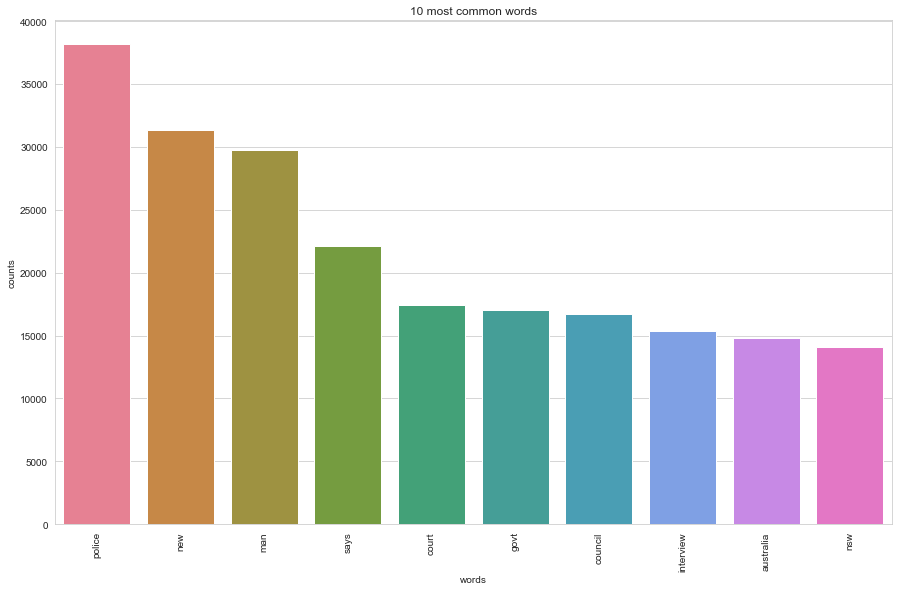

In [34]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed text
count_data = count_vectorizer.fit_transform(text['headline_text'])

plot_10_most_common_words(count_data, count_vectorizer)

In [36]:
#LDA model tranining
#To keep things simple, we will only tweak the number of topic parameters.
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

KeyboardInterrupt: 